# Preprocessing Dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

## Load dataset & Check that

In [2]:
# read dataset
df = pd.read_csv("./dataset/ai4i2020.csv")

print(f"dataset shape: {df.shape}")
# the number of data is 10000 row and 14 features

# first 5 rows of dataset
df.head()

dataset shape: (10000, 14)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# dataset info
df.info()

# dataset description
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


count of missing values : UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64
machine failures: 3.39%
TWF     46
HDF    115
PWF     95
OSF     98
RNF     19
dtype: int64


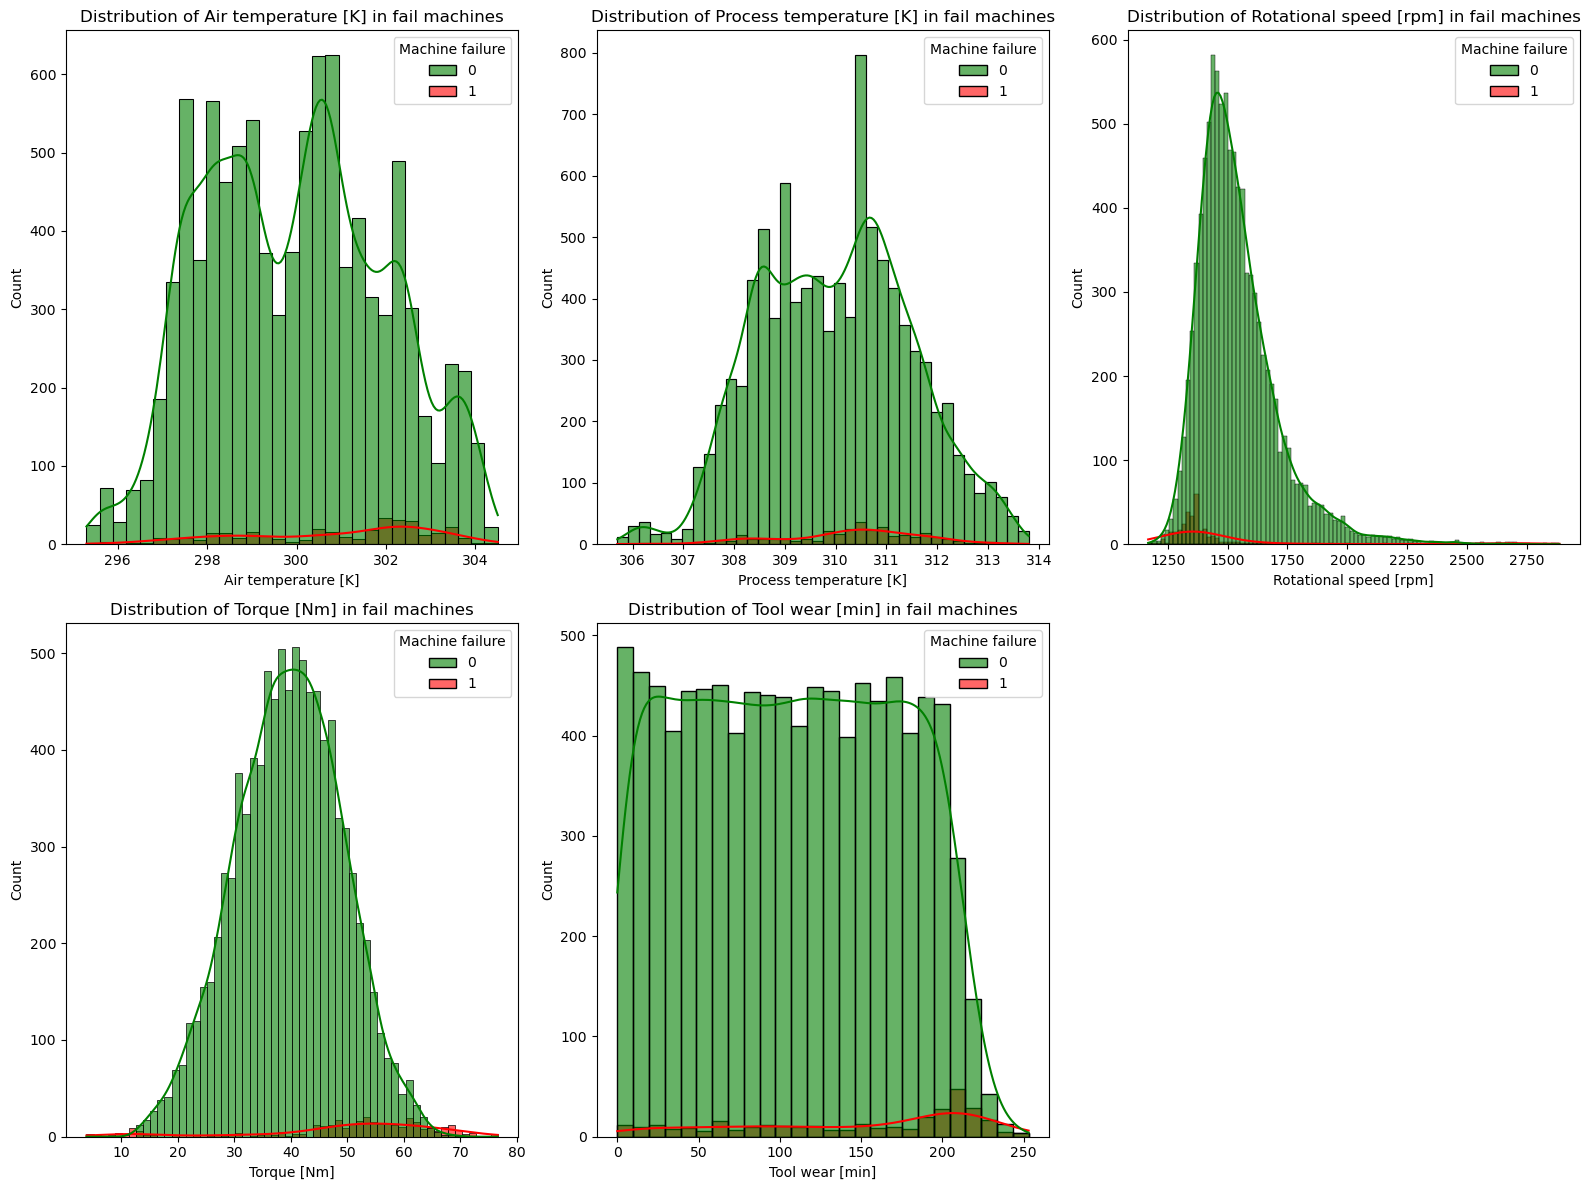

In [8]:
# print the count of all missing values in dataset for each column
print(f"count of missing values : {df.isnull().sum()}")

# failure distribution in percent

failure_count = df['Machine failure'].value_counts(normalize=True) * 100

print(f"machine failures: {failure_count[1]:.2f}%")

failure_types = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()

print(failure_types)

# filter data and pick just numeric data


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))

# annot : mean show the correlation coefficient value on each cell of the map.
# fmt : mean show the numbers with two decimal places.
# cmap coolwarm : Positive correlation is displayed with warm colors (red) and negative correlation with cool colors (blue).

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Matrix Of Data')

plt.tight_layout()

plt.savefig('./plots/correlation_matrix.png')
plt.close()

# Plot distribution of numerical features by machine failure

selected_features = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(selected_features, 1):

    plt.subplot(2, 3, i)

    sns.histplot(data=df, x=feature, hue='Machine failure', kde=True, palette=['green', 'red'], alpha=0.6)

    plt.title(f'Distribution of {feature} in fail machines')

    plt.tight_layout()

plt.savefig('./plots/feature_distributions.png')

## feature engineering & Create new features

power_[W]                     0.176039
temperature_difference_[K]   -0.111676
tool_wear_strain              0.190427
Machine failure               1.000000
Name: Machine failure, dtype: float64


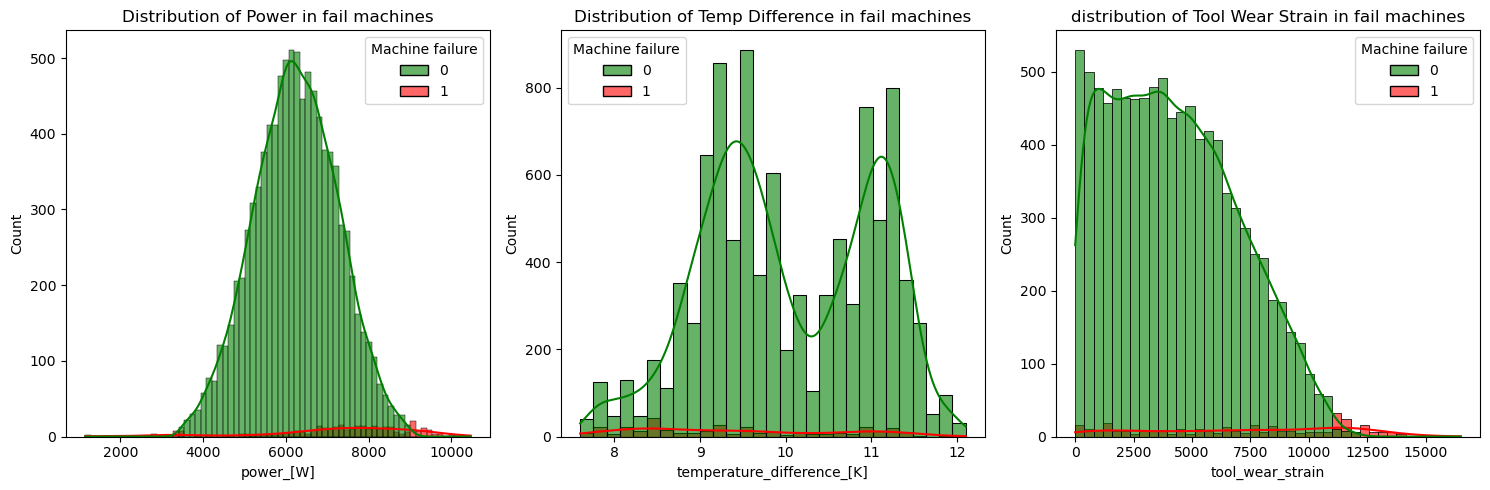

In [6]:
# create a copy from dataframe to avoid destroy the original dataset
new_df = df.copy()

# power_[W] = Torque [Nm] × Rotational speed [rpm]
# convert rpm to rad/s: rpm * 2π/60 = rpm * 0.10472
# power_[W] = Torque [Nm] * Rotational speed [rad/s]
new_df['power_[W]'] = df['Torque [Nm]'] * df['Rotational speed [rpm]'] * 0.10472

# temperature_difference_[K] = Process temperature [K] - Air temperature [K]
new_df['temperature_difference_[K]'] = df['Process temperature [K]'] - df['Air temperature [K]']

# tool_wear_strain = Tool wear [min] × Torque [Nm]
new_df['tool_wear_strain'] = df['Tool wear [min]'] * df['Torque [Nm]']

# correlations of new features with machine failure
new_features_corr = new_df[['power_[W]', 'temperature_difference_[K]', 
                                 'tool_wear_strain', 'Machine failure']].corr()['Machine failure']

print(new_features_corr)

# Visualize the new features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=new_df, x='power_[W]', hue='Machine failure', kde=True, 
            palette=['green', 'red'], alpha=0.6)
plt.title('Distribution of Power in fail machines')

plt.subplot(1, 3, 2)
sns.histplot(data=new_df, x='temperature_difference_[K]', hue='Machine failure', kde=True, 
            palette=['green', 'red'], alpha=0.6)
plt.title('Distribution of Temp Difference in fail machines')

plt.subplot(1, 3, 3)
sns.histplot(data=new_df, x='tool_wear_strain', hue='Machine failure', kde=True, 
            palette=['green', 'red'], alpha=0.6)
plt.title('distribution of Tool Wear Strain in fail machines')

plt.tight_layout()
plt.savefig('plots/new_features.png')

In [ ]:
# Separate features and target
x_data = df.drop(['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y_data = df['Machine failure']

# Also create separate dataframes for specific failure types
y_twf = df['TWF']  # tool wear failure
y_hdf = df['HDF']  # heat dissipation failure
y_pwf = df['PWF']  # power failure
y_osf = df['OSF']  # overstrain failure
y_rnf = df['RNF']  # random failure

# split data to train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

# define which columns should be transformed in which way
categorical_features = ['Type']
numerical_features = [col for col in x_data.columns if col != 'Type']

# create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# fit the preprocessor on the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# get feature names after transformation
numeric_features_out = numerical_features

# get categorical feature names after one-hot encoding
# this assumes 'Type' can be 'L', 'M', 'H'
categorical_transformer = preprocessor.named_transformers_['cat']
encoded_features = categorical_transformer.get_feature_names_out(['Type'])

# combine feature names
all_feature_names = numeric_features_out + list(encoded_features)

# convert to DataFrame for better readability
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names)

# Clean feature names by replacing problematic characters
X_train_processed_df.columns = [col.replace('[', '_').replace(']', '_').replace(
    '<', 'less_than').replace('>', 'greater_than') for col in X_train_processed_df.columns]
X_test_processed_df.columns = [col.replace('[', '_').replace(']', '_').replace(
    '<', 'less_than').replace('>', 'greater_than') for col in X_test_processed_df.columns]

# Get feature names (now cleaned)
feature_names = X_train_processed_df.columns

print(feature_names)

print(X_train_processed_df.head())

base_directory = "./dataset/preprocessed/"

# change datasets to csv & save them
X_train_processed_df.to_csv(f"{base_directory}X_train.csv", index=False)
X_test_processed_df.to_csv(f"{base_directory}X_test.csv", index=False)
y_train.reset_index(drop=True).to_csv(
    f"{base_directory}y_train.csv", index=False)
y_test.reset_index(drop=True).to_csv(
    f"{base_directory}y_test.csv", index=False)

Index(['Air temperature _K_', 'Process temperature _K_',
       'Rotational speed _rpm_', 'Torque _Nm_', 'Tool wear _min_', 'Type_L',
       'Type_M'],
      dtype='object')
   Air temperature _K_  Process temperature _K_  Rotational speed _rpm_  \
0             0.998914                 0.604282               -0.460607   
1            -1.505194                -1.153260               -0.775574   
2             0.498092                 1.077466               -1.007654   
3            -0.553633                -0.139294               -0.709265   
4            -1.455112                -1.018064                1.070019   

   Torque _Nm_  Tool wear _min_  Type_L  Type_M  
0     0.718305        -0.843997     0.0     1.0  
1     0.638456         0.382263     0.0     1.0  
2     0.558607         0.460870     0.0     1.0  
3     1.626586        -0.372359     1.0     0.0  
4    -1.128202        -0.906882     1.0     0.0  


In [17]:
print(f"train data targets includes {y_train.value_counts()}")
print("-"*10)
print(f"test data targets includes {y_test.value_counts()}")

train data targets includes Machine failure
0    7729
1     271
Name: count, dtype: int64
----------
test data targets includes Machine failure
0    1932
1      68
Name: count, dtype: int64
